In [1]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("Resources/final_panel_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_hours,annual_income,white,black,hisp,other_race,degree,09_updated_degree,updated_years_of_education,annual_weeks_worked,union_job,usual_hours_per_week,labor_income_from_business,years_experience,full_time_experience,part_time_experience,government_worker,hourly_wage,wage_inflation_factor,adj_hourly_wage,real_hourly_wage,full_time_job,potential_experience,high_school_or_less,bachelors_degree,advanced_degree,occupation_category,agriculture,mining_construction,durables,nondurables,transport,transport.1,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production,transport.2,transport.3
0,1981,1,1.0,10,34,16.0,1600,10000.0,1,0,0,0,1.0,1.0,17,32.0,0,50.0,0,12.0,12.0,0.0,0.0,6.0,2.31,14.0,3.0,1,12.0,0,1,0,Other,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1981,1,2.0,10,32,14.0,520,9095.0,0,1,0,0,0.0,0.0,14,13.0,1,40.0,0,14.0,11.0,3.0,0.0,17.0,2.31,40.0,4.0,1,12.0,1,0,0,Production,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2009,1,1.0,10,64,12.0,2550,45200.0,0,1,0,0,0.0,0.0,12,51.0,0,50.0,0,39.0,38.0,1.0,0.0,18.0,1.02,18.0,3.0,1,46.0,1,0,0,Production,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1999,1,2.0,10,50,12.0,3072,25000.0,1,0,0,0,0.0,0.0,12,51.0,0,60.0,0,30.0,30.0,0.0,0.0,8.0,1.27,10.0,2.0,1,32.0,1,0,0,Transportation and Materials Moving,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1990,1,3.0,10,26,12.0,2100,24500.0,1,0,0,0,0.0,0.0,12,50.0,0,42.0,0,8.0,8.0,0.0,0.0,12.0,1.57,18.0,3.0,1,8.0,1,0,0,Production,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3]:
# Value count column
df['full_time_job'].value_counts()

1    29019
0     4379
Name: full_time_job, dtype: int64

In [4]:
# Display all columns
my_list = list(df)
print (my_list)

['year', 'gender', 'region', 'relation_to_head_of_house', 'age', 'years_of_education', 'annual_hours', 'annual_income', 'white', 'black', 'hisp', 'other_race', 'degree', '09_updated_degree', 'updated_years_of_education', 'annual_weeks_worked', 'union_job', 'usual_hours_per_week', 'labor_income_from_business', 'years_experience', 'full_time_experience', 'part_time_experience', 'government_worker', 'hourly_wage', 'wage_inflation_factor', 'adj_hourly_wage', 'real_hourly_wage', 'full_time_job', 'potential_experience', 'high_school_or_less', 'bachelors_degree', 'advanced_degree', 'occupation_category', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', '

In [5]:
# Drop the non-beneficial columns.
dropped_df = df.drop(['degree', '09_updated_degree', 'annual_hours', 'adj_hourly_wage', 'annual_weeks_worked', 'usual_hours_per_week', 'updated_years_of_education', 'occupation_category', 'labor_income_from_business', 'years_experience', 'hourly_wage', 'wage_inflation_factor', 'real_hourly_wage', 'potential_experience', 'year', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', 'physicians', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'office_admin', 'farmer', 'construction', 'production', 'transport.2', 'transport.3'], axis=1)
dropped_df.head()

,gender,region,relation_to_head_of_house,age,years_of_education,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,government_worker,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1,1.0,10,34,16.0,10000.0,1,0,0,0,0,12.0,0.0,0.0,1,0,1,0
1,1,2.0,10,32,14.0,9095.0,0,1,0,0,1,11.0,3.0,0.0,1,1,0,0
2,1,1.0,10,64,12.0,45200.0,0,1,0,0,0,38.0,1.0,0.0,1,1,0,0
3,1,2.0,10,50,12.0,25000.0,1,0,0,0,0,30.0,0.0,0.0,1,1,0,0
4,1,3.0,10,26,12.0,24500.0,1,0,0,0,0,8.0,0.0,0.0,1,1,0,0


In [6]:
# Check for null values
df['gender'].isnull().values.any()

False

In [7]:
# Check for null values
df['annual_income'].isnull().values.any()

False

In [8]:
# Check for null values
df['full_time_experience'].isnull().values.any()

False

In [9]:
# Check for null values
df['part_time_experience'].isnull().values.any()

False

In [10]:
# Check for null values
df['region'].isnull().values.any()

True

In [11]:
# Check for null values
df['relation_to_head_of_house'].isnull().values.any()

False

In [12]:
# Check for null values
df['age'].isnull().values.any()

False

In [13]:
# Check for null values
df['years_of_education'].isnull().values.any()

True

In [14]:
# Check for null values
df['white'].isnull().values.any()

False

In [15]:
# Check for null values
df['black'].isnull().values.any()

False

In [16]:
# Check for null values
df['hisp'].isnull().values.any()

False

In [17]:
# Check for null values
df['other_race'].isnull().values.any()

False

In [18]:
# Check for null values
df['union_job'].isnull().values.any()

False

In [19]:
# Check for null values
df['government_worker'].isnull().values.any()

True

In [20]:
# Check for null values
df['full_time_job'].isnull().values.any()

False

In [21]:
# Check for null values
df['high_school_or_less'].isnull().values.any()

False

In [22]:
# Check for null values
df['bachelors_degree'].isnull().values.any()

False

In [23]:
# Check for null values
df['advanced_degree'].isnull().values.any()

False

In [24]:
# Drop the null-value columns.
model_df = dropped_df.drop(['region', 'years_of_education', 'government_worker'], axis=1)
pd.set_option('display.max_columns', None)
model_df.head()

,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,10000.0,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1,10,32,9095.0,0,1,0,0,1,11.0,3.0,1,1,0,0
2,1,10,64,45200.0,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1,10,50,25000.0,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1,10,26,24500.0,1,0,0,0,0,8.0,0.0,1,1,0,0


In [25]:
# Define features set
X = model_df.copy()
X.drop("full_time_job", axis=1, inplace=True)
X.head()

,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,10000.0,1,0,0,0,0,12.0,0.0,0,1,0
1,1,10,32,9095.0,0,1,0,0,1,11.0,3.0,1,0,0
2,1,10,64,45200.0,0,1,0,0,0,38.0,1.0,1,0,0
3,1,10,50,25000.0,1,0,0,0,0,30.0,0.0,1,0,0
4,1,10,26,24500.0,1,0,0,0,0,8.0,0.0,1,0,0


In [26]:
# Define target vector
y = model_df["full_time_job"].ravel()
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [28]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [29]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [30]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [32]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [33]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [34]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [35]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,407,701
Actual 1,227,7015


Accuracy Score : 0.8888622754491018
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.37      0.47      1108
           1       0.91      0.97      0.94      7242

    accuracy                           0.89      8350
   macro avg       0.78      0.67      0.70      8350
weighted avg       0.87      0.89      0.88      8350



In [36]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.37488556040897764, 'annual_income'),
 (0.17742302388834974, 'full_time_experience'),
 (0.16905106599004097, 'age'),
 (0.15450318413318317, 'part_time_experience'),
 (0.032202890895956286, 'relation_to_head_of_house'),
 (0.024714701738687322, 'gender'),
 (0.01584276817396728, 'union_job'),
 (0.010393197482994653, 'white'),
 (0.01019814748385394, 'black'),
 (0.009988413696628982, 'high_school_or_less'),
 (0.008205665247449591, 'bachelors_degree'),
 (0.005923508139999258, 'advanced_degree'),
 (0.00397500060238194, 'hisp'),
 (0.0026928721175293355, 'other_race')]

Text(0, 0.5, 'Features')

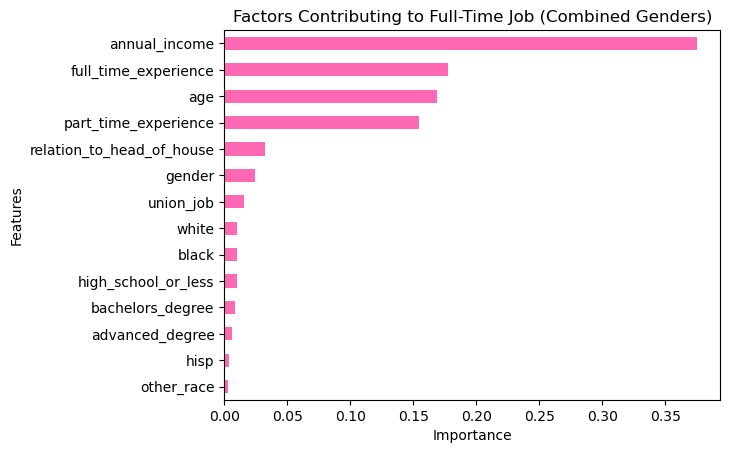

In [37]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='hotpink', title= 'Factors Contributing to Full-Time Job (Combined Genders)', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')

In [38]:
# Drop the null-value columns.
model2_df = model_df.drop(['annual_income'], axis=1)
pd.set_option('display.max_columns', None)
model2_df.head()

,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1,10,32,0,1,0,0,1,11.0,3.0,1,1,0,0
2,1,10,64,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1,10,50,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1,10,26,1,0,0,0,0,8.0,0.0,1,1,0,0


In [39]:
# Define features set
X = model2_df.copy()
X.drop("full_time_job", axis=1, inplace=True)
X.head()

,gender,relation_to_head_of_house,age,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,high_school_or_less,bachelors_degree,advanced_degree
0,1,10,34,1,0,0,0,0,12.0,0.0,0,1,0
1,1,10,32,0,1,0,0,1,11.0,3.0,1,0,0
2,1,10,64,0,1,0,0,0,38.0,1.0,1,0,0
3,1,10,50,1,0,0,0,0,30.0,0.0,1,0,0
4,1,10,26,1,0,0,0,0,8.0,0.0,1,0,0


In [40]:
# Define target vector
y = model2_df["full_time_job"].ravel()
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [41]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [42]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [43]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [44]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [46]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [47]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [48]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [49]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,261,847
Actual 1,351,6891


Accuracy Score : 0.8565269461077845
Classification Report
              precision    recall  f1-score   support

           0       0.43      0.24      0.30      1108
           1       0.89      0.95      0.92      7242

    accuracy                           0.86      8350
   macro avg       0.66      0.59      0.61      8350
weighted avg       0.83      0.86      0.84      8350



In [50]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3123354199770871, 'age'),
 (0.310821998458949, 'full_time_experience'),
 (0.2333176747898488, 'part_time_experience'),
 (0.04271416636342329, 'relation_to_head_of_house'),
 (0.03271431525501459, 'gender'),
 (0.019187112753101098, 'union_job'),
 (0.010021067167329315, 'high_school_or_less'),
 (0.008894719635207387, 'white'),
 (0.008455505749131481, 'black'),
 (0.007667204115741552, 'bachelors_degree'),
 (0.006419243216609905, 'advanced_degree'),
 (0.004259738651045998, 'hisp'),
 (0.0031918338675106404, 'other_race')]

Text(0, 0.5, 'Features')

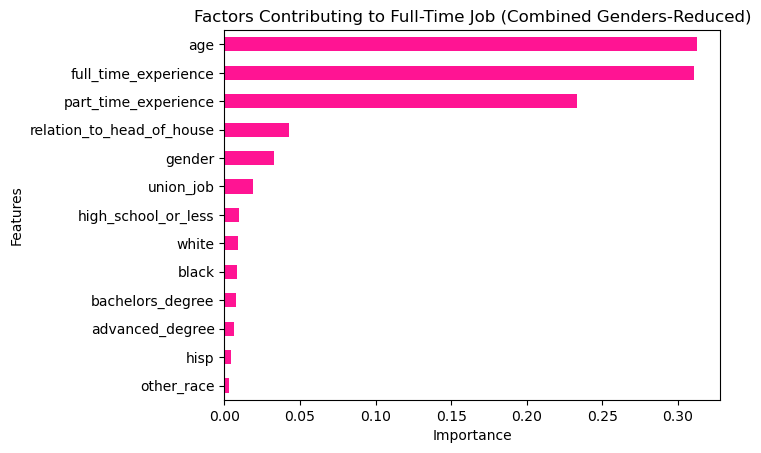

In [52]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deeppink', title= 'Factors Contributing to Full-Time Job (Combined Genders-Reduced)', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')